## Autoencoders
- Entrying in Deep Learning.
- Autoencoders are used in dimensionality reduction, image compression, image denoising, feature extraction, and anomaly detection.
- Autoencoders: Neural Network that copies the input values to the output values. Since it does not require labels, it is considered Unsupervised.
- - If the input is a set of vectors, we want to transform them doing certain operations into a new set of vectors containing the most important patterns of the inputs and ignoring noise, called: Feature Vectors. This new set of vectors, needs to be able to get transformed back into the same input vectors following other operations.
* The aforementioned "Feature Vectors" is what we are interested on.
* There should be less hidden neurons than input neurons, to avoid overfitting or learning useles information such as noise.
* Quite useful when data problems are complex and non-linear.

### Prepare data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils_od import count_stat, confusion_matrix, confusion_matrix_threshold,plot_data ,descriptive_stat_threshold 
from pyod.utils.data import generate_data

contamination = 0.05 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 25      # number of features
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train, 
    n_test=n_test, 
    n_features= n_features, 
    contamination=contamination, 
    random_state=123)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2.396090,2.092611,2.073392,1.988262,1.953473,2.450997,1.631040,1.746182,1.898050,2.380148,...,1.703454,2.502966,2.119108,2.106098,2.165173,2.340826,2.170109,1.749139,1.678661,1.829647
1,1.775596,1.829438,2.054768,1.577190,1.594549,1.373357,1.946647,1.841420,1.595761,2.538094,...,1.974274,1.621608,2.003085,2.076871,1.788868,2.062829,2.084499,2.267568,1.536939,2.132725
2,1.835679,1.612100,2.174908,2.084460,2.472896,2.029110,2.410107,2.282164,2.208201,2.106240,...,2.035652,2.065291,2.197711,2.288806,2.480274,1.946207,1.947120,1.754344,2.265033,2.119050
3,2.420241,2.158485,1.958602,1.903787,2.230522,1.984789,1.964441,2.360795,1.820773,2.116560,...,2.040977,1.511381,1.834332,2.070046,1.911699,1.816916,2.213950,2.099758,2.259999,2.039066
4,1.646926,1.778067,1.760959,1.894087,1.888225,2.228021,2.489542,2.326377,1.969615,2.001316,...,2.063858,2.341009,1.844115,2.076399,1.742857,1.969530,1.821128,1.946249,1.678283,1.797722


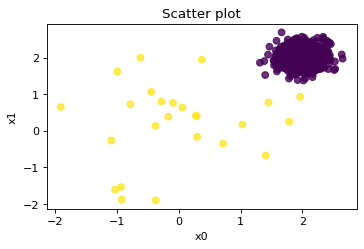

In [2]:
# Plot
plt.figure(figsize=(5, 3), dpi=80)
plt.scatter(X_train_pd[0], X_train_pd[1], c=y_train, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

### Build the model

In [3]:
from pyod.models.auto_encoder import AutoEncoder

# 1 input layer with as many neurons as features in the input
# 2 Hidden Layers with 2 neurons each.
# 1 output layer with as many neurons as features in the desired output
atcdr = AutoEncoder(contamination=0.05, hidden_neurons =[2, 2])
atcdr.fit(X_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                650       
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 52        
                                                                 
 dropout_2 (Dropout)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6

2023-05-17 15:59:52.663979: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


15/15 [==============================] - 0s 6ms/step - loss: 3.1595 - val_loss: 1.9899
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 2.7486 - val_loss: 1.8215
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 2.5028 - val_loss: 1.7136
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 2.3623 - val_loss: 1.6374
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 2.2597 - val_loss: 1.5804
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 2.1817 - val_loss: 1.5403
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 2.1291 - val_loss: 1.5053
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 2.0834 - val_loss: 1.4731
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 2.0406 - val_loss: 1.4417
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 2.0041 - val_loss: 1.4108
Epoch 11/100
15/15 [=

AutoEncoder(batch_size=32, contamination=0.05, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[2, 2], l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x29298ef70>, optimizer='adam',
      output_activation='sigmoid', preprocessing=True, random_state=None,
      validation_size=0.1, verbose=1)

In [4]:
# Training data
y_train_scores = atcdr.decision_function(X_train)
y_train_pred = atcdr.predict(X_train)

# Test data
y_test_scores = atcdr.decision_function(X_test)
y_test_pred = atcdr.predict(X_test) # outlier labels (0 or 1)

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , atcdr.threshold_)
print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))

16/16 [==============================] - 0s 322us/step
The threshold for the defined contamination rate: 4.123853537071335
The training data: {0: 475, 1: 25}
The training data: {0: 475, 1: 25}


### Understand parameters
* Model: 
- - 1 input layer with as many neurons as features in the input
- - 2 Hidden Layers with 2 neurons each.
- - 1 output layer with as many neurons as features in the desired output
* Dropout layer after each dense layer with a 0.2 rate. (20% of the neurons are removed to avoid overfitting)
* In this case, there are 25 neurons in the input layer, therefore 1433 parameters to be trained.
* batch_size: Data is divided into batchs during training. It can reduce computational burden for gradient descent ( when optimizing parameters to minimize the loss function ).
- - Example: Assume there are 100.000 instances. In the gradient descent we may compute and sum up the 100.000 gradients to update the parameters of the model at every single update. This requires a lot of memory and computation. Hence, we will update the parameters using batches of 32 instances.
* l2_regularization: Parameter that adds a penalty value to penalize the loss when obtaining large magnitude of weights. ( Avoiding exploding gradients )

In [10]:
atcdr.get_params()

{'batch_size': 32,
 'contamination': 0.05,
 'dropout_rate': 0.2,
 'epochs': 100,
 'hidden_activation': 'relu',
 'hidden_neurons': [2, 2],
 'l2_regularizer': 0.1,
 'loss': <function tensorflow.python.keras.losses.mean_squared_error(y_true, y_pred)>,
 'optimizer': 'adam',
 'output_activation': 'sigmoid',
 'preprocessing': True,
 'random_state': None,
 'validation_size': 0.1,
 'verbose': 1}

### Determine the threshold

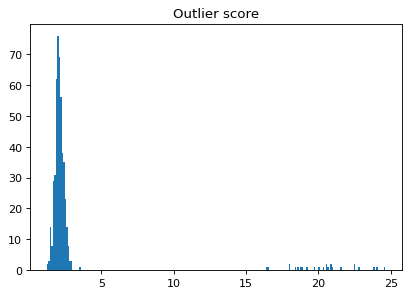

In [6]:
plt.figure(figsize=(6, 4), dpi=80)
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

A reasonable threshold could be 4.2.

### Descriptive statistics

In [5]:
threshold = atcdr.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,24,Anomaly_Score
0,Normal,475,95.0,2.01,2.01,2.02,2.00,2.00,2.00,2.0,...,1.99,2.02,2.01,2.00,1.99,2.00,2.0,2.01,1.99,2.11
1,Outlier,25,5.0,-0.02,0.21,-0.05,0.13,0.01,-0.32,0.2,...,-0.07,-0.30,0.11,0.18,0.14,-0.28,0.2,0.09,-0.10,20.27


In [6]:
descriptive_stat_threshold(X_test,y_test_scores, atcdr.threshold_)

,Group,Count,Count %,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,24,Anomaly_Score
0,Normal,475,95.0,2.00,1.98,2.02,2.01,1.99,2.01,1.99,...,2.00,2.0,2.01,2.00,2.00,1.99,2.01,1.98,1.99,2.10
1,Outlier,25,5.0,-0.22,-0.45,0.04,-0.26,-0.34,-0.14,0.12,...,-0.07,-0.1,0.15,0.02,-0.36,0.12,0.50,-0.08,0.36,20.93


In [7]:
confusion_matrix(y_train,y_train_pred)

Pred,0,1
Actual,,
0.0,475,0
1.0,0,25


### Aggregate Model Predictions to Achieve Stability

In [8]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.models.auto_encoder import AutoEncoder
atcdr1 = AutoEncoder(contamination=0.05, hidden_neurons =[2, 2])
atcdr2 = AutoEncoder(contamination=0.05, hidden_neurons =[10, 2, 10])
atcdr3 = AutoEncoder(contamination=0.05, hidden_neurons =[15, 10, 2, 10, 15] )

# Standardize data
X_train_norm, X_test_norm = standardizer(X_train, X_test)

# Just prepare data frames so we can store the model results. There are three models.
train_scores = np.zeros([X_train.shape[0], 3])
test_scores = np.zeros([X_test.shape[0], 3])
atcdr1.fit(X_train_norm)
atcdr2.fit(X_train_norm)
atcdr3.fit(X_train_norm)
    
# Store the results in each column:
train_scores[:, 0] = atcdr1.decision_function(X_train_norm) 
train_scores[:, 1] = atcdr2.decision_function(X_train_norm) 
train_scores[:, 2] = atcdr3.decision_function(X_train_norm)
test_scores[:, 0] = atcdr1.decision_function(X_test_norm) 
test_scores[:, 1] = atcdr2.decision_function(X_test_norm) 
test_scores[:, 2] = atcdr3.decision_function(X_test_norm)

# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 25)                650       
                                                                 
 dropout_4 (Dropout)         (None, 25)                0         
                                                                 
 dense_6 (Dense)             (None, 25)                650       
                                                                 
 dropout_5 (Dropout)         (None, 25)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 52        
                                                                 
 dropout_6 (Dropout)         (None, 2)                 0         
                                                                 
 dense_8 (Dense)             (None, 2)                

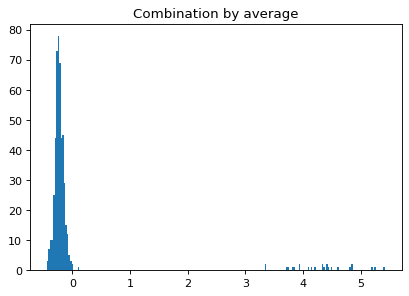

In [9]:
plt.figure(figsize=(6, 4), dpi=80)
# Combination by average
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [11]:
descriptive_stat_threshold(X_train,y_train_by_average, 0.5)

,Group,Count,Count %,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,24,Anomaly_Score
0,Normal,475,95.0,2.01,2.01,2.02,2.00,2.00,2.00,2.0,...,1.99,2.02,2.01,2.00,1.99,2.00,2.0,2.01,1.99,-0.23
1,Outlier,25,5.0,-0.02,0.21,-0.05,0.13,0.01,-0.32,0.2,...,-0.07,-0.30,0.11,0.18,0.14,-0.28,0.2,0.09,-0.10,4.32


In [12]:
descriptive_stat_threshold(X_test,y_test_by_average, 0.5)

,Group,Count,Count %,0,1,2,3,4,5,6,...,16,17,18,19,20,21,22,23,24,Anomaly_Score
0,Normal,475,95.0,2.00,1.98,2.02,2.01,1.99,2.01,1.99,...,2.00,2.0,2.01,2.00,2.00,1.99,2.01,1.98,1.99,-0.23
1,Outlier,25,5.0,-0.22,-0.45,0.04,-0.26,-0.34,-0.14,0.12,...,-0.07,-0.1,0.15,0.02,-0.36,0.12,0.50,-0.08,0.36,4.48


In [16]:
confusion_matrix_threshold(y_train,y_train_by_average,0.5)

Pred,0,1
Actual,,
0.0,475,0
1.0,0,25


In [17]:
confusion_matrix_threshold(y_test,y_test_by_average, 0.5)

Pred,0,1
Actual,,
0.0,475,0
1.0,0,25


## Summary Autoencoders
* 
*
*